### 一元分散分析

In [148]:
# 必要なライブラリのimport
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set_theme()

In [149]:
# データの読み込み
data1 = pd.read_csv('anova-1.csv')

In [150]:
# データの確認
data1.head()

,Body_Length,Body_Height,Feed
0,34.873,8.597,A
1,28.165,5.555,A
2,28.415,3.874,A
3,26.781,3.084,A
4,32.596,6.270,A


<Axes: xlabel='Feed', ylabel='Body_Height'>

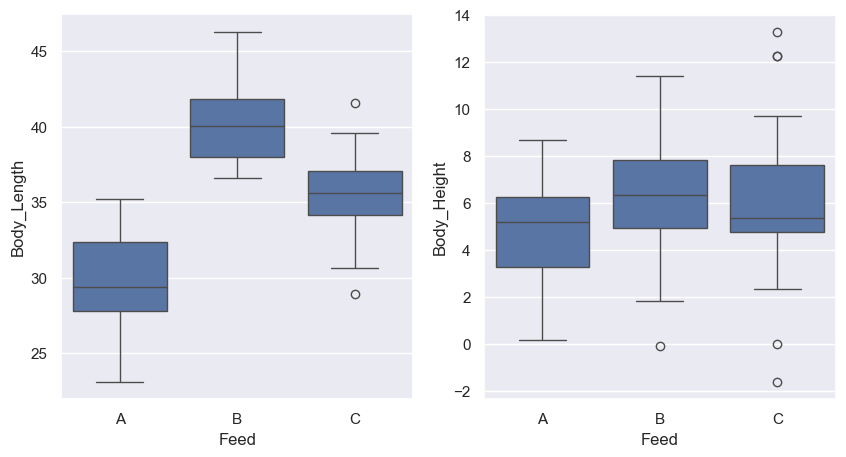

In [151]:
# 箱ひげ図の作成
f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.boxplot(x='Feed', y='Body_Length', data=data1, ax=axes[0])
sns.boxplot(x='Feed', y='Body_Height', data=data1, ax=axes[1])

In [152]:
# 飼料ごとの体長の平均
me_Feed_A = np.mean(data1.query('Feed == "A"')['Body_Length'])
me_Feed_B = np.mean(data1.query('Feed == "B"')['Body_Length'])
me_Feed_C = np.mean(data1.query('Feed == "C"')['Body_Length'])
print('Feed A:', me_Feed_A)
print('Feed B:', me_Feed_B)
print('Feed C:', me_Feed_C)

Feed A: 29.820099999999993
Feed B: 40.2296
Feed C: 35.49113333333333


In [153]:
# データ全体の体長の平均
mu_all = np.mean(data1['Body_Length'])
mu_all

np.float64(35.180277777777775)

In [154]:
# 各群の平均の配列
# 3つの数字が30個ずつ並んだリストを作成し、ndarrayに変換
mu_n_list = [me_Feed_A]*data1.query('Feed == "A"').shape[0] + \
			[me_Feed_B]*data1.query('Feed == "B"').shape[0] + \
			[me_Feed_C]*data1.query('Feed == "C"').shape[0]
mu_n = np.array(mu_n_list)

# 効果（各群平均 のデータ全体の平均からのずれ）
effect = mu_n - mu_all

# 効果の平方和（群間平方和）
squares_feed = np.sum(effect**2)
squares_feed

np.float64(1629.71375668889)

In [155]:
# 誤差（その他のずれ）
resid = data1['Body_Length'] - mu_n

# 誤差の平方和（群内平方和）
squares_resid = np.sum(resid**2)
squares_resid

np.float64(669.8829113666667)

In [156]:
# 群間変動（効果）の自由度 = 3(飼料の数) - 1
df_feed = 2

# 群内変動（誤差）の自由度 = 飼料Aの自由度 + 飼料Bの自由度 + 飼料Cの自由度
#                      = (30 - 1) + (30 - 1) + (30 - 1)
df_resid = 87

In [157]:
# 効果の分散
variance_feed = squares_feed/df_feed
variance_feed

np.float64(814.856878344445)

In [158]:
# 誤差の分散
variance_resid = squares_resid/df_resid
variance_resid

np.float64(7.699803578927203)

In [159]:
# F比を計算
f_ratio = variance_feed/variance_resid
f_ratio

np.float64(105.82826821382075)

In [160]:
# p値を計算
1-sp.stats.f.cdf(x=f_ratio, dfn=df_feed, dfd=df_resid)

np.float64(1.1102230246251565e-16)

In [161]:
# statsmodelsで一元分散分析を実施
anova_model_1 = smf.ols('Body_Length ~ Feed', data=data1).fit()
sm.stats.anova_lm(anova_model_1, typ=2)

,sum_sq,df,F,PR(>F)
Feed,1629.713757,2.0,105.828268,5.001548e-24
Residual,669.882911,87.0,NaN,NaN


In [162]:
# 体高について一元分散分析を実施
anova_model_2 = smf.ols('Body_Height ~ Feed', data=data1).fit()
sm.stats.anova_lm(anova_model_2, typ=2)

,sum_sq,df,F,PR(>F)
Feed,28.056643,2.0,1.819162,0.168276
Residual,670.893326,87.0,NaN,NaN


### 二元分散分析

In [163]:
# データの読み込み
data2 = pd.read_csv('anova-2.csv')

In [164]:
# データの確認
data2.head()

,Body_Length,Feed,Area
0,34.873,A,X
1,28.165,A,X
2,28.415,A,X
3,26.781,A,X
4,32.596,A,X


In [165]:
# データ全体の体長の平均
me_all2 = np.mean(data2['Body_Length'])
me_all2

np.float64(35.382866666666665)

In [166]:
# 飼料ごとの体長の平均
me_Feed_A = np.mean(data2.query('Feed=="A"')['Body_Length'])
me_Feed_B = np.mean(data2.query('Feed=="B"')['Body_Length'])
me_Feed_C = np.mean(data2.query('Feed=="C"')['Body_Length'])
print('Feed A:', me_Feed_A)
print('Feed B:', me_Feed_B)
print('Feed C:', me_Feed_C)

Feed A: 30.373166666666666
Feed B: 40.664166666666674
Feed C: 35.111266666666666


In [167]:
# 養殖池ごとの体長の平均
me_Area_X = np.mean(data2.query('Area=="X"')['Body_Length'])
me_Area_Y = np.mean(data2.query('Area=="Y"')['Body_Length'])
print('Area X:', me_Area_X)
print('Area Y:', me_Area_Y)

Area X: 35.180277777777775
Area Y: 35.585455555555555


In [168]:
# 全体の平方和
squares_all2 = np.sum((data2['Body_Length']-me_all2)**2)
squares_all2

np.float64(4304.4535108)

In [169]:
# 飼料の平方和
feed_means_list = [me_Feed_A]*data2.query('Feed == "A"').shape[0] + \
                  [me_Feed_B]*data2.query('Feed == "B"').shape[0] + \
                  [me_Feed_C]*data2.query('Feed == "C"').shape[0]
feed_means_expanded = np.array(feed_means_list)
squares_feed = np.sum((feed_means_expanded - me_all2)**2)
squares_feed

np.float64(3183.7794204000047)

In [170]:
# 養殖池の平方和
area_means_list = [me_Area_X]*data2.query('Area == "X"').shape[0] + \
                  [me_Area_Y]*data2.query('Area == "Y"').shape[0]
area_means_expanded = np.array(area_means_list)
squares_area = np.sum((area_means_expanded-me_all2)**2)
squares_area

np.float64(7.387606422222308)

In [171]:
# 誤差の平方和
squares_resid2 = squares_all2 - squares_feed - squares_area
squares_resid2

np.float64(1113.286483977773)

In [172]:
df_feed = 2     # 飼料の自由度
df_area = 1     # 養殖池の自由度
df_resid = 176  # 誤差の自由度

In [173]:
# 飼料の分散
variance_feed = squares_feed/df_feed
variance_feed

np.float64(1591.8897102000024)

In [174]:
# 養殖池の分散
variance_area = squares_area/df_area
variance_area

np.float64(7.387606422222308)

In [175]:
# 誤差の分散
variance_resid2 = squares_resid2/df_resid
variance_resid2

np.float64(6.3254913862373465)

In [176]:
# 飼料のF比
f_ratio_feed = variance_feed/variance_resid2
f_ratio_feed

np.float64(251.66261607178023)

In [177]:
# 養殖池のF比
f_ratio_area = variance_area/variance_resid2
f_ratio_area

np.float64(1.1679102809776727)

In [178]:
# 飼料のp値
1-sp.stats.f.cdf(x=f_ratio_feed, dfn=df_feed, dfd=df_resid)

np.float64(1.1102230246251565e-16)

In [179]:
# 養殖池のp値
1-sp.stats.f.cdf(x=f_ratio_area, dfn=df_area, dfd=df_resid)

np.float64(0.2813096649258633)

In [180]:
# statsmodelsで二元分散分析を実施
anova_model_3 = smf.ols('Body_Length ~ Feed + Area', data=data2).fit()
sm.stats.anova_lm(anova_model_3, typ=2)

,sum_sq,df,F,PR(>F)
Feed,3183.779420,2.0,251.662616,2.411422e-52
Area,7.387606,1.0,1.167910,2.813097e-01
Residual,1113.286484,176.0,NaN,NaN
